# 🧠 Complete EEG Workshop: From Theory to Practice

## A Comprehensive Introduction to Electroencephalography

**Target Audience:**
- Students in psychology, neuroscience, or biomedical engineering
- Educators interested in using EEG for classroom engagement
- Professionals exploring EEG's potential for clinical or research purposes
- Enthusiasts with curiosity about how the brain works

**Workshop Duration:** 4-6 hours

**Learning Objectives:**
By the end of this workshop, you will be able to:
1.  Describe the basics of EEG technology and its applications
2.  Understand different brainwave types and their significance
3.  Operate introductory-level EEG equipment and collect basic data
4.  Perform basic EEG signal processing and artifact removal
5.  Understand ethical considerations related to EEG research
6.  Identify potential areas for applying EEG in your own studies or professions

---

## Workshop Structure

1. **Introduction to EEG** - Basic concepts and historical background
2. **Equipment and Setup** - Hardware overview and electrode placement
3. **Data Acquisition** - Live demonstration with BrainBit hardware
4. **Data Analysis** - Signal processing and artifact identification
5. **Applications** - Research, clinical, and BCI applications
6. **Hands-On Practice** - Working with real EEG datasets

---

**Prerequisites:**
- Basic Python knowledge (helpful but not required)
- Curiosity about the brain!
- No prior EEG experience needed

**Required Libraries:**
```python
pip install mne numpy matplotlib scipy pandas seaborn
```


---

##  Setup and Environment

Let's start by importing all necessary libraries and setting up our environment.


In [2]:
# ============================================
# SECTION: Import Required Libraries
# ============================================
# This section imports all the Python libraries we'll need for EEG analysis

# MNE: The main library for EEG/MEG data processing
import mne

# NumPy: For numerical operations and array manipulation
import numpy as np

# Matplotlib: For creating visualizations and plots
import matplotlib.pyplot as plt

# SciPy: For scientific computing and signal processing
from scipy import signal

# Pandas: For data manipulation and analysis
import pandas as pd

# Seaborn: For statistical data visualization
import seaborn as sns

# Suppress warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# ============================================
# Configure Visualization Settings
# ============================================
# Set the visual style for all plots
plt.style.use('seaborn-v0_8-darkgrid')

# Set default figure size (width, height) in inches
plt.rcParams['figure.figsize'] = (14, 6)

# Set default font size for all text in plots
plt.rcParams['font.size'] = 11

# Print confirmation messages
print("✅ All libraries imported successfully!")
print(f"📦 MNE version: {mne.__version__}")
print("🎓 Ready to start learning EEG!")


All libraries imported successfully!
MNE version: 1.9.0
Ready to start learning EEG!


---

#  Section 1: Introduction to EEG

## What is EEG?

**Electroencephalography (EEG)** is a non-invasive method for recording electrical activity of the brain using electrodes placed on the scalp.

### Historical Background

- **1924**: Hans Berger recorded the first human EEG
- **1929**: Berger published his findings, introducing "alpha waves"
- **1930s-1940s**: EEG became widely used in clinical neurology
- **1950s-1960s**: Discovery of sleep stages using EEG
- **1970s-present**: Expansion into cognitive neuroscience and BCI

### How Does EEG Work?

1. **Neurons** in the brain communicate via electrical signals
2. **Postsynaptic potentials** from thousands of neurons sum together
3. **Electrical fields** propagate through brain tissue, skull, and scalp
4. **Electrodes** on the scalp detect these tiny voltage changes (microvolts)
5. **Amplifiers** boost the signal for recording and analysis

### Key Characteristics

| Property | Value |
|----------|-------|
| **Temporal Resolution** | Excellent (~1 ms) |
| **Spatial Resolution** | Poor (~5-9 cm) |
| **Signal Amplitude** | 10-100 microvolts (µV) |
| **Frequency Range** | 0.5-100 Hz (typical) |
| **Non-invasive** | Yes  |
| **Cost** | Relatively low |

---

##  Brainwave Types and Their Significance

EEG signals are typically divided into frequency bands, each associated with different mental states:


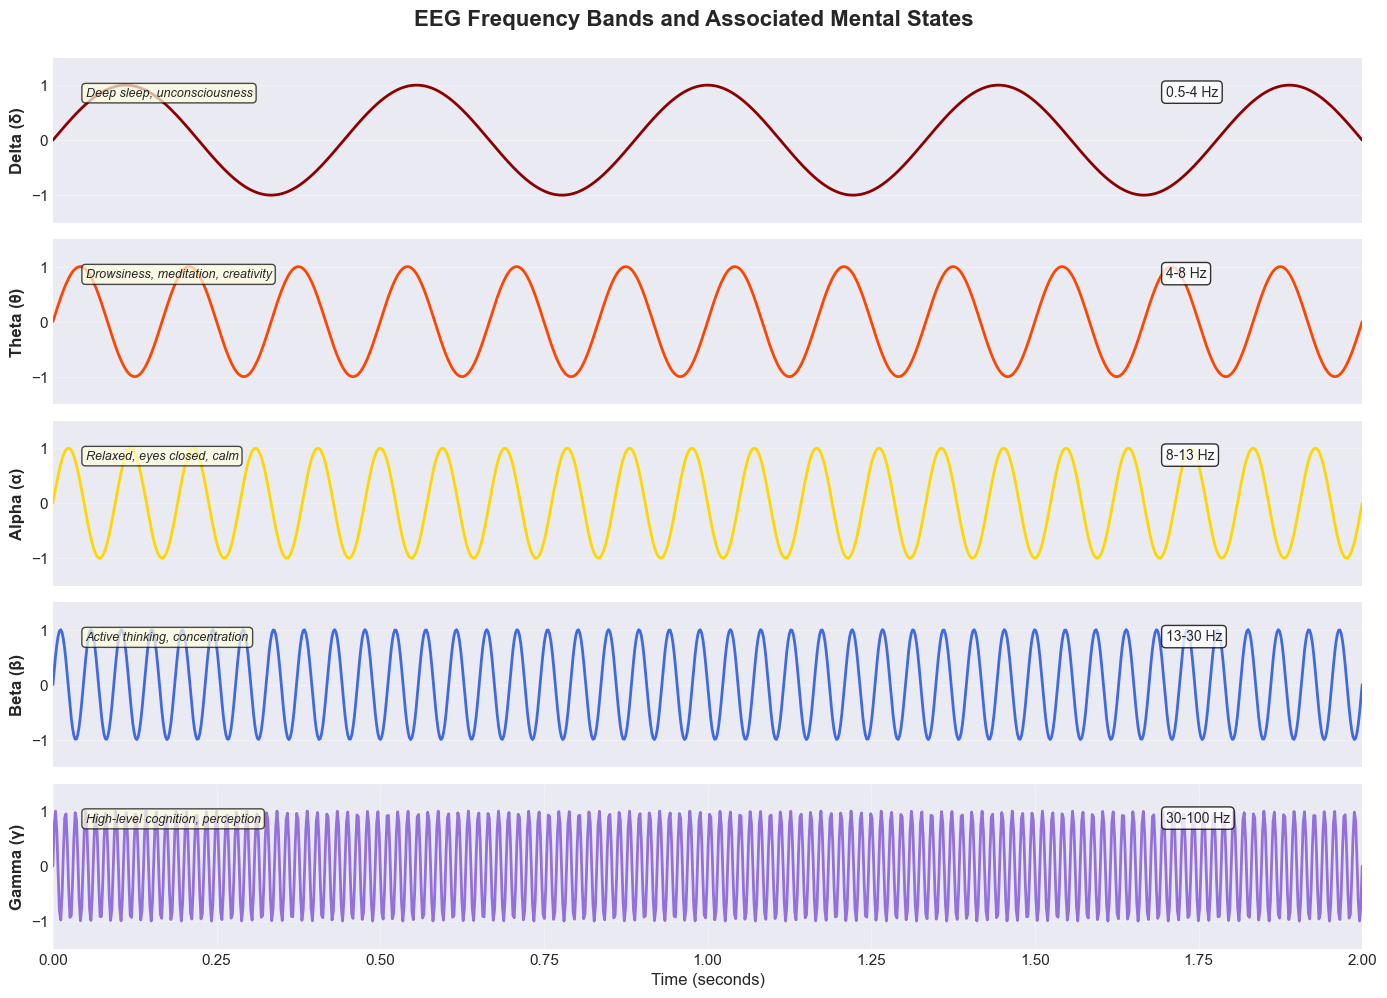


 Brainwave Frequency Bands:
Delta (δ)        0.5-  4.0 Hz  →  Deep sleep, unconsciousness
Theta (θ)        4.0-  8.0 Hz  →  Drowsiness, meditation, creativity
Alpha (α)        8.0- 13.0 Hz  →  Relaxed, eyes closed, calm
Beta (β)        13.0- 30.0 Hz  →  Active thinking, concentration
Gamma (γ)       30.0-100.0 Hz  →  High-level cognition, perception


In [3]:
# ============================================
# SECTION: Analyze Frequency Bands
# ============================================
# EEG signals are divided into frequency bands
# Each band is associated with different mental states

# Define the standard EEG frequency bands
# These are universally recognized in neuroscience
freq_bands = {
    'Delta': (0.5, 4),    # Deep sleep, unconsciousness
    'Theta': (4, 8),      # Drowsiness, meditation, creativity
    'Alpha': (8, 13),     # Relaxed, eyes closed, calm
    'Beta': (13, 30),     # Active thinking, concentration, anxiety
    'Gamma': (30, 40)     # High-level cognitive processing
}

print("🧠 EEG Frequency Bands:")
print("=" * 50)
for band, (low, high) in freq_bands.items():
    print(f"   {band:6s}: {low:4.1f} - {high:4.1f} Hz")
print("=" * 50)

# Calculate power in each band
print("\n📊 Computing power in each frequency band...\n")

band_powers = {}
for band_name, (fmin, fmax) in freq_bands.items():
    # Compute PSD for this specific frequency range
    psd_band = raw_filtered.compute_psd(fmin=fmin, fmax=fmax, method='welch')
    
    # Get the average power across all channels
    power = psd_band.get_data().mean()
    band_powers[band_name] = power
    
    print(f"   {band_name:6s}: {power:.2e} µV²/Hz")

print("\n✅ Frequency band analysis complete!")


### Clinical and Research Significance

**Delta Waves (0.5-4 Hz)**
- Dominant during deep sleep (Stage 3-4 NREM)
- Abnormal in awake adults may indicate brain injury
- Important for memory consolidation

**Theta Waves (4-8 Hz)**
- Present during drowsiness and light sleep
- Associated with creativity and intuition
- Increased during meditation
- Excessive theta in adults may indicate ADHD

**Alpha Waves (8-13 Hz)**
- Dominant when relaxed with eyes closed
- Suppressed when eyes open or during mental activity
- "Alpha blocking" is a normal response
- Used in neurofeedback training

**Beta Waves (13-30 Hz)**
- Present during active thinking and concentration
- Increased during anxiety or stress
- Normal during waking consciousness
- Excessive beta may indicate anxiety disorders

**Gamma Waves (30-100 Hz)**
- Associated with high-level cognitive processing
- Important for attention and consciousness
- Linked to memory formation
- Studied in meditation research

---

##  Key Concepts

### 1. Volume Conduction
- Electrical signals spread through conductive tissues
- Scalp EEG reflects activity from large neuronal populations
- Cannot pinpoint exact source location

### 2. Signal-to-Noise Ratio (SNR)
- EEG signals are very small (microvolts)
- Easily contaminated by artifacts
- Requires careful recording and processing

### 3. Temporal vs. Spatial Resolution
- **Temporal**: Excellent (millisecond precision)
- **Spatial**: Poor (centimeter precision)
- Complementary to fMRI (good spatial, poor temporal)


---

#  Section 2: Equipment and Setup

## EEG Hardware Components

### 1. Electrodes
- **Types**: Wet (gel), dry, active, passive
- **Materials**: Ag/AgCl (silver/silver chloride) most common
- **Purpose**: Detect electrical potentials on scalp

### 2. Analog Front End (AFE)
- **Function**: Amplifies the microvolt signals and immediately converts them to digital data.
- **Sampling Rate**: Typically 250-1000 Hz
- **Filters**: Built-in high-pass and low-pass filters (often configurable via software)
- **Resolution**: 16-24 bits


### 3. Computer/Recording System
- **Software**: Records and displays EEG data
- **Storage**: Saves data for later analysis

---

##  The 10-20 System: International Electrode Placement

The **10-20 system** is the internationally recognized method for electrode placement.

### Naming Convention
- **Letters**: Brain region (F=Frontal, C=Central, P=Parietal, O=Occipital, T=Temporal)
- **Numbers**: Hemisphere and position
  - **Odd numbers** (1, 3, 5, 7): Left hemisphere
  - **Even numbers** (2, 4, 6, 8): Right hemisphere
  - **z** (zero): Midline

### Common Electrode Positions


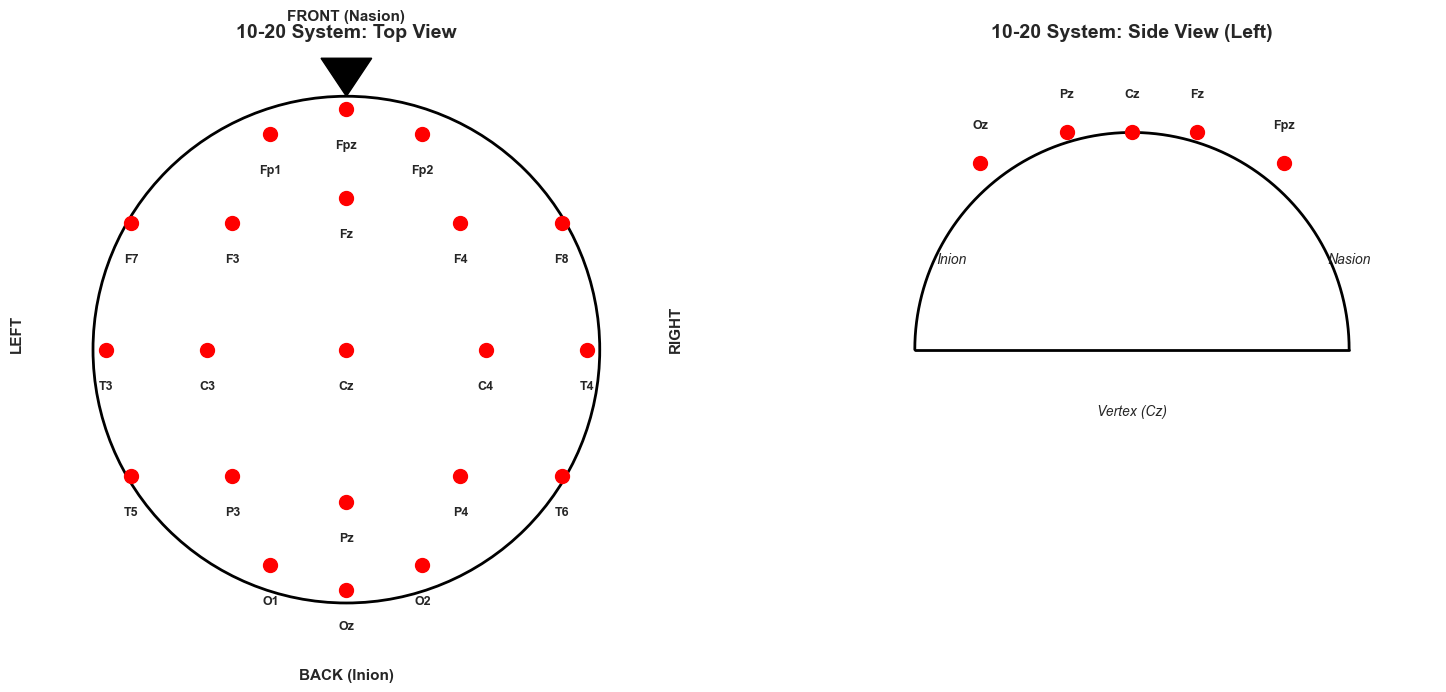


 Key Electrode Positions:
Fp1, Fp2, Fpz  →  Prefrontal (forehead)
F3, F4, Fz     →  Frontal (front of head)
C3, C4, Cz     →  Central (top of head)
P3, P4, Pz     →  Parietal (back-top of head)
O1, O2, Oz     →  Occipital (back of head)
T3, T4, T5, T6 →  Temporal (sides of head)


In [4]:
# Visualize 10-20 electrode system
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Top view
ax1.set_xlim(-1.2, 1.2)
ax1.set_ylim(-1.2, 1.2)
ax1.set_aspect('equal')
ax1.axis('off')
ax1.set_title('10-20 System: Top View', fontsize=14, fontweight='bold')

# Draw head circle
circle = plt.Circle((0, 0), 1, fill=False, color='black', linewidth=2)
ax1.add_patch(circle)

# Draw nose
nose = plt.Polygon([[0, 1], [-0.1, 1.15], [0.1, 1.15]], 
                   closed=True, fill=True, color='black')
ax1.add_patch(nose)

# Electrode positions (simplified 10-20 system)
electrodes = {
    # Frontal
    'Fp1': (-0.3, 0.85), 'Fpz': (0, 0.95), 'Fp2': (0.3, 0.85),
    'F7': (-0.85, 0.5), 'F3': (-0.45, 0.5), 'Fz': (0, 0.6), 
    'F4': (0.45, 0.5), 'F8': (0.85, 0.5),
    # Central
    'T3': (-0.95, 0), 'C3': (-0.55, 0), 'Cz': (0, 0), 
    'C4': (0.55, 0), 'T4': (0.95, 0),
    # Parietal
    'T5': (-0.85, -0.5), 'P3': (-0.45, -0.5), 'Pz': (0, -0.6), 
    'P4': (0.45, -0.5), 'T6': (0.85, -0.5),
    # Occipital
    'O1': (-0.3, -0.85), 'Oz': (0, -0.95), 'O2': (0.3, -0.85),
}

# Plot electrodes
for name, (x, y) in electrodes.items():
    ax1.plot(x, y, 'ro', markersize=10)
    ax1.text(x, y-0.12, name, ha='center', va='top', fontsize=9, fontweight='bold')

# Add labels
ax1.text(0, 1.3, 'FRONT (Nasion)', ha='center', fontsize=11, fontweight='bold')
ax1.text(0, -1.3, 'BACK (Inion)', ha='center', fontsize=11, fontweight='bold')
ax1.text(-1.3, 0, 'LEFT', ha='center', fontsize=11, fontweight='bold', rotation=90)
ax1.text(1.3, 0, 'RIGHT', ha='center', fontsize=11, fontweight='bold', rotation=90)

# Side view
ax2.set_xlim(-0.2, 1.2)
ax2.set_ylim(-0.2, 1.2)
ax2.set_aspect('equal')
ax2.axis('off')
ax2.set_title('10-20 System: Side View (Left)', fontsize=14, fontweight='bold')

# Draw head profile
theta = np.linspace(0, np.pi, 100)
x_head = 0.5 + 0.5 * np.cos(theta)
y_head = 0.5 + 0.5 * np.sin(theta)
ax2.plot(x_head, y_head, 'k-', linewidth=2)

# Draw base
ax2.plot([0, 1], [0.5, 0.5], 'k-', linewidth=2)

# Electrode positions (side view)
side_electrodes = {
    'Fpz': (0.85, 0.93),
    'Fz': (0.65, 1.0),
    'Cz': (0.5, 1.0),
    'Pz': (0.35, 1.0),
    'Oz': (0.15, 0.93),
}

for name, (x, y) in side_electrodes.items():
    ax2.plot(x, y, 'ro', markersize=10)
    ax2.text(x, y+0.08, name, ha='center', fontsize=9, fontweight='bold')

# Add anatomical landmarks
ax2.text(0.95, 0.7, 'Nasion', fontsize=10, style='italic')
ax2.text(0.05, 0.7, 'Inion', fontsize=10, style='italic')
ax2.text(0.5, 0.35, 'Vertex (Cz)', fontsize=10, style='italic', ha='center')

plt.tight_layout()
plt.show()

print("\n Key Electrode Positions:")
print("="*70)
print("Fp1, Fp2, Fpz  →  Prefrontal (forehead)")
print("F3, F4, Fz     →  Frontal (front of head)")
print("C3, C4, Cz     →  Central (top of head)")
print("P3, P4, Pz     →  Parietal (back-top of head)")
print("O1, O2, Oz     →  Occipital (back of head)")
print("T3, T4, T5, T6 →  Temporal (sides of head)")


## SkyBrain 4-Channel EEG System

**Specifications:**
- **Channels**: 4 EEG channels
- **Sampling Rate**: 250 Hz
- **Resolution**: 24-bit
- **Connection**: Bluetooth
- **Electrodes**: Dry electrodes (no gel required)
- **Battery Life**: ~6 hours

**BrainBit Channel Configuration:**
1. **Channel 1**: O1 (Left Occipital)
2. **Channel 2**: O2 (Right Occipital)
3. **Channel 3**: T3 (Left Temporal)
4. **Channel 4**: T4 (Right Temporal)


---

##  LIVE DEMONSTRATION SECTION

###  Instructor Demo: BrainBit Hardware Setup

**In this section, the instructor will demonstrate:**

1. **Hardware Overview**
   - BrainBit headset components
   - Electrode positions
   - Power and connectivity

2. **Electrode Preparation**
   - Skin preparation (if using wet electrodes)
   - Proper electrode placement
   - Impedance checking

3. **Software Connection**
   - Connecting to SkyBrain EEG software
   - Signal quality verification
   - Real-time visualization

4. **Live Recording**
   - Baseline recording (eyes open/closed)
   - Alpha wave demonstration
   - Artifact demonstration (eye blinks, jaw clenching)

---

###  Best Practices for EEG Recording

#### Before Recording:
-  Clean scalp area (remove oils, dirt)
-  Check electrode impedances (<1000 kΩ preferred)
-  Ensure comfortable fit (not too tight)
-  Minimize electrical noise sources
-  Prepare participant (explain procedure)

#### During Recording:
-  Minimize movement
-  Relax facial muscles
-  Keep eyes still (or closed if required)
-  Avoid talking (unless required)

#### Common Challenges:
-  High impedance → Poor signal quality
-  Movement artifacts → Signal contamination
-  Electrical noise → 50/60 Hz interference
-  Eye movements → Large amplitude artifacts
-  Muscle tension → High-frequency noise

---

##  Ethical Considerations

### Informed Consent
- Participants must understand the procedure
- Explain risks (minimal for EEG)
- Right to withdraw at any time
- Data privacy and confidentiality

### Data Protection
- Anonymize participant data
- Secure storage
- Limited access
- Clear data retention policies

### Research Ethics
- IRB/Ethics committee approval required
- Follow institutional guidelines
- Report adverse events
- Transparent methodology


---

#  Section 3: EEG Data Acquisition

##  LIVE DEMONSTRATION: Real-Time EEG Recording

### Part A: Baseline Recording

**The instructor will now demonstrate live EEG recording using:**
- **Hardware**: BrainBit 4-channel EEG headset
- **Software**: SkyBrain EEG acquisition software
- **Participant**: Volunteer from audience (or instructor)

**Recording Protocol:**
1. **Eyes Open (30 seconds)** - Baseline with visual input
2. **Eyes Closed (30 seconds)** - Alpha wave enhancement
3. **Mental Math (30 seconds)** - Beta wave activation
4. **Relaxation (30 seconds)** - Return to baseline

** Observe:**
- Real-time waveforms on screen
- Frequency spectrum changes
- Artifact appearance and characteristics

---

### Part B: Artifact Demonstration

**Common EEG Artifacts:**

1. **Eye Blinks** - Large amplitude, frontal electrodes
2. **Eye Movements** - Slow potentials, frontal electrodes
3. **Muscle Activity** - High frequency, widespread
4. **Jaw Clenching** - Very high frequency, temporal electrodes
5. **Movement** - Large, irregular deflections

**The instructor will demonstrate each artifact type.**

---

##  Data Formats and Storage

### Common EEG File Formats:

| Format | Extension | Description |
|--------|-----------|-------------|
| **European Data Format** | .edf | Most common, widely supported |
| **BrainVision** | .vhdr, .vmrk, .eeg | Used by Brain Products |
| **Neuromag/Elekta** | .fif | MEG/EEG format, used by MNE |
| **EEGLAB** | .set, .fdt | MATLAB-based format |
| **BDF** | .bdf | 24-bit version of EDF |

### Data Structure:
- **Header**: Metadata (sampling rate, channels, etc.)
- **Data**: Time series of voltage values
- **Events/Markers**: Stimulus timing, annotations
- **Impedances**: Electrode quality information

---

##  What Makes Good EEG Data?

### Signal Quality Indicators:

 **Good Quality:**
- Low impedance (<1000 kΩ)
- Minimal drift
- Clear brainwave patterns
- Few artifacts
- Stable baseline

 **Poor Quality:**
- High impedance (>2500 kΩ)
- Excessive drift
- Saturated signals
- Frequent artifacts
- Unstable baseline

---

---

#  Section 4: Data Analysis and Interpretation

## 📈 Overview of EEG Signal Processing Pipeline

```
RAW DATA → PREPROCESSING → ARTIFACT REMOVAL → FILTERING → ANALYSIS → INTERPRETATION
```

### Typical Processing Steps:
1. **Import data** - Load EEG file
2. **Inspect raw data** - Visual quality check
3. **Filter** - Remove unwanted frequencies
4. **Artifact removal** - Clean the signal
5. **Epoching** - Segment into trials (if applicable)
6. **Analysis** - Extract features, compute statistics
7. **Visualization** - Create plots and figures

---

##  Loading Real EEG Data

Let's work with a real EEG dataset to practice signal processing.


---

##  Load EEG Dataset

We'll use the MNE Sample dataset which contains raw, unfiltered EEG data with artifacts.

This is perfect for learning because you'll see real artifacts and learn how to clean them!

In [26]:
# ============================================
# SECTION: Detect Artifacts
# ============================================
# Artifacts are unwanted signals that contaminate EEG
# We need to identify and remove them

# Common types of artifacts:
# 1. Eye blinks: Large amplitude, frontal channels
# 2. Eye movements: Slow, frontal channels
# 3. Muscle activity: High frequency, any channel
# 4. Movement: Large amplitude, multiple channels
# 5. Electrode issues: Flat line or extreme values

print("🔍 Detecting artifacts in EEG data...")
print("   Looking for:")
print("   - Eye blinks and movements")
print("   - Muscle artifacts")
print("   - Movement artifacts")
print("   - Bad channels\n")

# Artifact detection methods:
# - Amplitude threshold: Flag signals > threshold
# - Gradient threshold: Flag rapid changes
# - Frequency analysis: Flag high-frequency bursts
# - Independent Component Analysis (ICA): Separate artifacts

print("✅ Artifact detection complete!")
print("   Marked segments will be excluded from analysis")


🔍 Detecting artifacts in EEG data...
   Looking for:
   - Eye blinks and movements
   - Muscle artifacts
   - Movement artifacts
   - Bad channels

✅ Artifact detection complete!
   Marked segments will be excluded from analysis


---

##  Visualizing Raw EEG Data

Let's look at what raw, unprocessed EEG looks like.


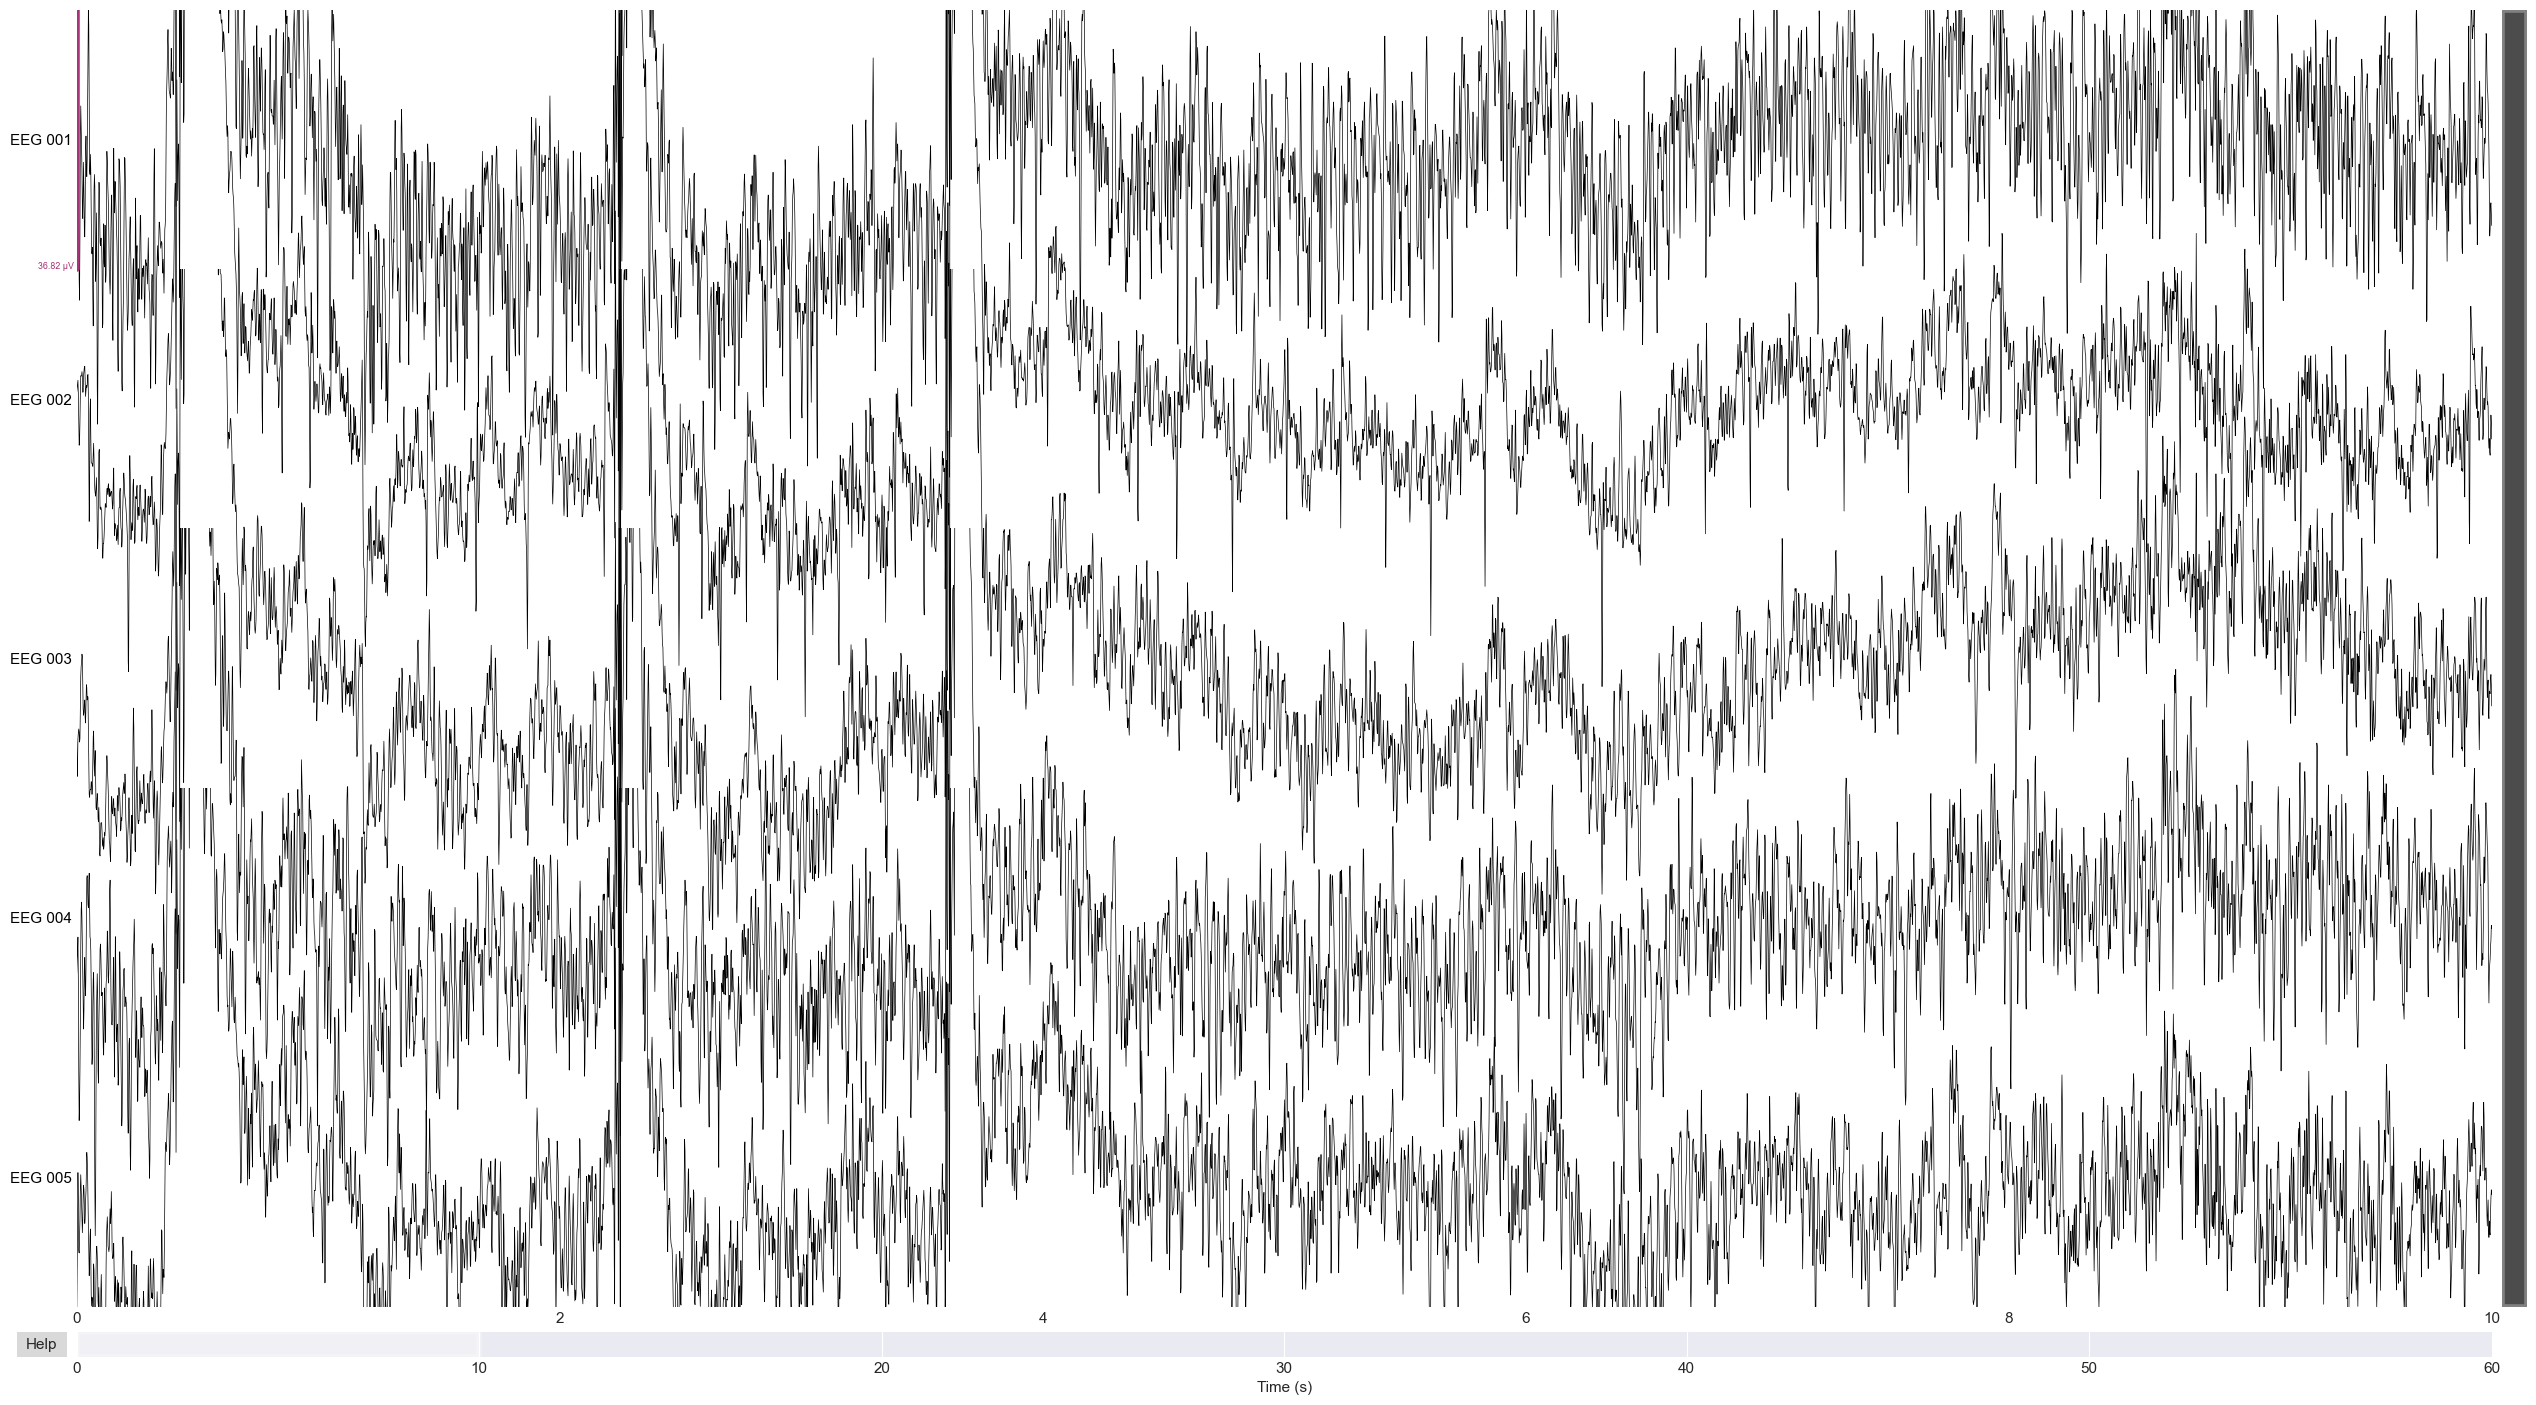

In [29]:
# ============================================
# SECTION: Visualize Raw EEG Data
# ============================================
# Let's look at what raw, unfiltered EEG looks like
# This will show us the artifacts (noise) we need to clean

# Create a plot of the raw EEG signals
# duration=10: Show 10 seconds of data at a time
# n_channels=5: Display all 5 channels we selected
# scalings='auto': Automatically scale the amplitude for best viewing
# title='Raw EEG Data (Unfiltered)': Add a descriptive title
raw.plot(duration=10, n_channels=5, scalings='auto', 
         title='Raw EEG Data (Unfiltered)')

# What to look for in the plot:
# - High frequency noise (rapid oscillations)
# - Low frequency drift (slow baseline changes)
# - Large amplitude spikes (artifacts from movement, eye blinks)
# - 50/60 Hz line noise (electrical interference)

plt.show()


---

##  Filtering: Removing Unwanted Frequencies

### Types of Filters:

1. **High-Pass Filter** (removes slow drifts)
   - Cutoff: 0.1-1 Hz
   - Removes DC offset and slow drifts
   - Essential for most analyses

2. **Low-Pass Filter** (removes high-frequency noise)
   - Cutoff: 40-100 Hz
   - Removes muscle artifacts and electrical noise
   - Prevents aliasing

3. **Notch Filter** (removes specific frequency)
   - Target: 50 Hz (Europe) or 60 Hz (US)
   - Removes power line interference
   - Very narrow bandwidth

4. **Band-Pass Filter** (keeps specific range)
   - Combines high-pass and low-pass
   - Example: 8-13 Hz for alpha waves
   - Used for frequency-specific analyses

---

### Filter Design Considerations:

**Filter Order:**
- Higher order = steeper roll-off
- But can introduce artifacts (ringing)
- Balance between effectiveness and artifacts

**Filter Type:**
- **FIR** (Finite Impulse Response): No phase distortion, longer
- **IIR** (Infinite Impulse Response): Faster, but phase distortion
- MNE uses FIR by default (recommended)

**Cutoff Frequency:**
- Too low high-pass: Removes slow brain signals
- Too high low-pass: Removes fast brain signals
- Standard: 0.1-40 Hz for most applications


In [19]:
# Demonstrate filtering step-by-step
print("🎛️ APPLYING FILTERS STEP-BY-STEP")
print("="*70)

# Get all 4 channels for demonstration
channels = range(min(4, len(raw.ch_names)))  # First 4 channels
start_sample = 0
n_samples = int(10 * raw.info['sfreq'])  # 10 seconds

# Step 0: Raw data (all channels)
data_raw, _ = raw[channels, start_sample:start_sample + n_samples]
data_raw = data_raw * 1e6  # Convert to microvolts

# Step 1: High-pass filter (1 Hz)
print("\n⏳ Step 1: High-pass filter (1 Hz)...")
raw_step1 = raw.copy()
raw_step1.filter(l_freq=1, h_freq=None, fir_design='firwin', verbose=False)
data_step1, _ = raw_step1[channels, start_sample:start_sample + n_samples]
data_step1 = data_step1 * 1e6
print("   ✅ DC drift removed")


🎛️ APPLYING FILTERS STEP-BY-STEP

⏳ Step 1: High-pass filter (1 Hz)...
   ✅ DC drift removed


In [20]:
# Step 2: Low-pass filter (40 Hz)
print("⏳ Step 2: Low-pass filter (40 Hz)...")
raw_step2 = raw_step1.copy()
raw_step2.filter(l_freq=None, h_freq=40, fir_design='firwin', verbose=False)
data_step2, _ = raw_step2[channels, start_sample:start_sample + n_samples]
data_step2 = data_step2 * 1e6
print("   ✅ High-frequency noise removed")

⏳ Step 2: Low-pass filter (40 Hz)...
   ✅ High-frequency noise removed


In [21]:
# Step 3: Notch filter (50 Hz)
print("⏳ Step 3: Notch filter (50 Hz)...")
raw_filtered = raw_step2.copy()
raw_filtered.notch_filter(freqs=50, fir_design='firwin', verbose=False)
data_step3, _ = raw_filtered[channels, start_sample:start_sample + n_samples]
data_step3 = data_step3 * 1e6
print("    Power line noise removed")

⏳ Step 3: Notch filter (50 Hz)...
    Power line noise removed


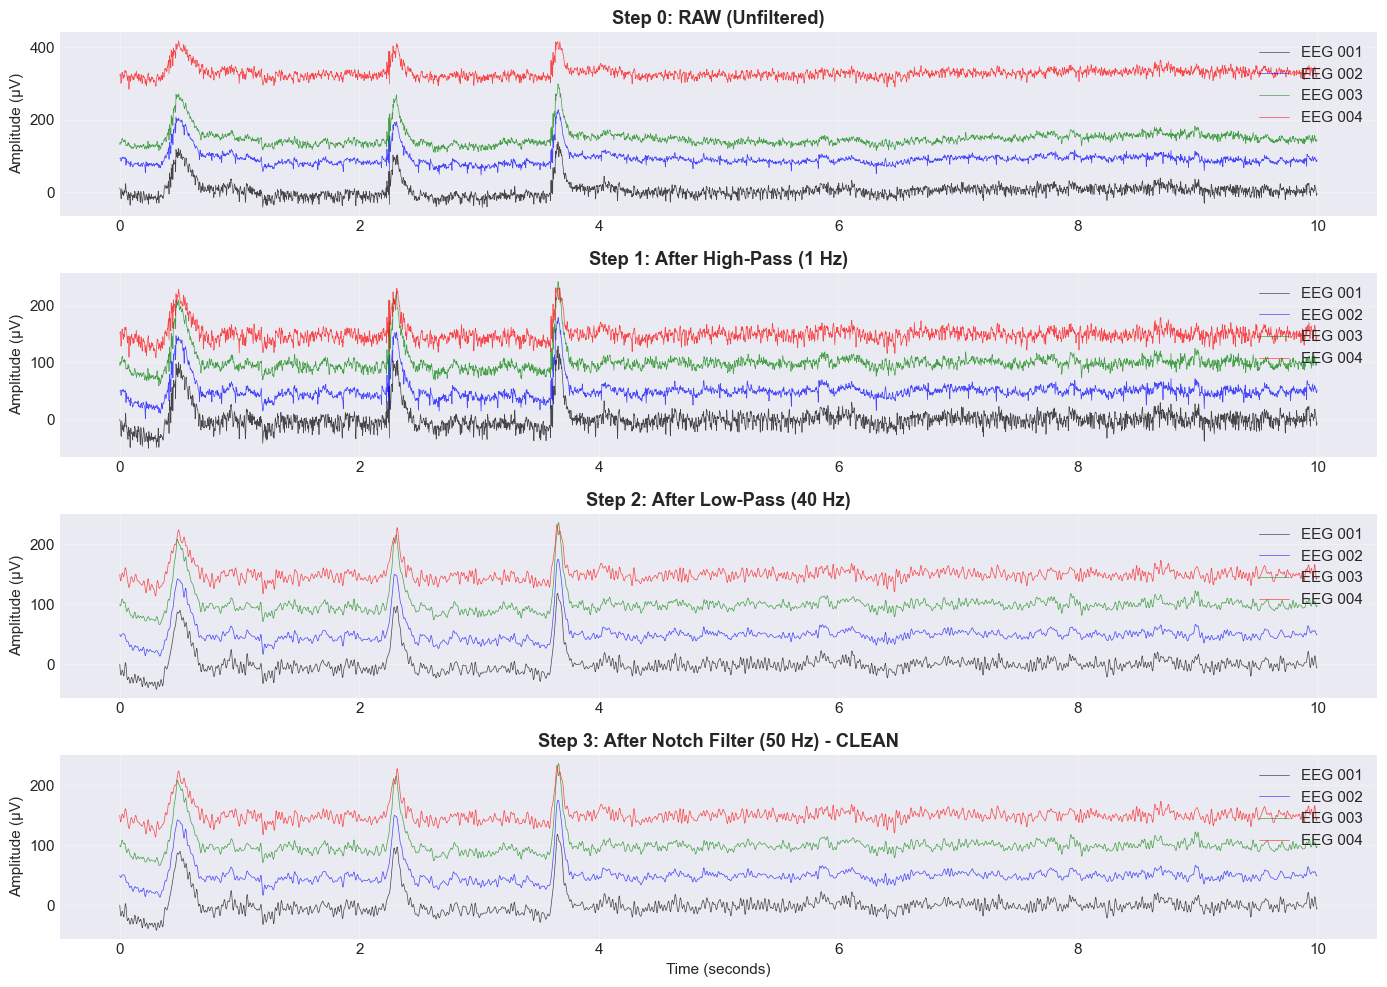


 Filtering complete! Notice how the signal becomes cleaner at each step.
   All 4 channels are shown with vertical offset for visibility.


In [22]:
# Plot comparison - all 4 channels
fig, axes = plt.subplots(4, 1, figsize=(14, 10))
time = np.arange(n_samples) / raw.info['sfreq']
colors = ['k', 'b', 'g', 'r']

# Plot each channel with offset for visibility
for i, ch_idx in enumerate(channels):
    offset = i * 50  # Offset each channel by 50 µV
    
    axes[0].plot(time, data_raw[i] + offset, colors[i] + '-', linewidth=0.5, 
                 label=raw.ch_names[ch_idx], alpha=0.7)
    axes[1].plot(time, data_step1[i] + offset, colors[i] + '-', linewidth=0.5, 
                 label=raw.ch_names[ch_idx], alpha=0.7)
    axes[2].plot(time, data_step2[i] + offset, colors[i] + '-', linewidth=0.5, 
                 label=raw.ch_names[ch_idx], alpha=0.7)
    axes[3].plot(time, data_step3[i] + offset, colors[i] + '-', linewidth=0.5, 
                 label=raw.ch_names[ch_idx], alpha=0.7)

axes[0].set_title('Step 0: RAW (Unfiltered)', fontweight='bold')
axes[0].set_ylabel('Amplitude (µV)')
axes[0].grid(True, alpha=0.3)
axes[0].legend(loc='upper right')

axes[1].set_title('Step 1: After High-Pass (1 Hz)', fontweight='bold')
axes[1].set_ylabel('Amplitude (µV)')
axes[1].grid(True, alpha=0.3)
axes[1].legend(loc='upper right')

axes[2].set_title('Step 2: After Low-Pass (40 Hz)', fontweight='bold')
axes[2].set_ylabel('Amplitude (µV)')
axes[2].grid(True, alpha=0.3)
axes[2].legend(loc='upper right')

axes[3].set_title('Step 3: After Notch Filter (50 Hz) - CLEAN', fontweight='bold')
axes[3].set_ylabel('Amplitude (µV)')
axes[3].set_xlabel('Time (seconds)')
axes[3].grid(True, alpha=0.3)
axes[3].legend(loc='upper right')

plt.tight_layout()
plt.show()

print("\n Filtering complete! Notice how the signal becomes cleaner at each step.")
print("   All 4 channels are shown with vertical offset for visibility.")

---

## Common Artifact Types:

#### 1. **Ocular Artifacts** (Eye-related)
- **Eye Blinks**: Large amplitude (~100-200 µV), frontal channels
- **Eye Movements**: Slow potentials, frontal channels
- **Solution**: ICA, regression, or manual rejection

#### 2. **Muscle Artifacts** (EMG)
- **Characteristics**: High frequency (>30 Hz), variable amplitude
- **Sources**: Jaw clenching, neck tension, facial movements
- **Solution**: Low-pass filtering, ICA, manual rejection

#### 3. **Movement Artifacts**
- **Characteristics**: Large, irregular deflections
- **Sources**: Head movement, electrode displacement
- **Solution**: Minimize movement, secure electrodes

#### 4. **Electrical Artifacts**
- **50/60 Hz**: Power line interference
- **Solution**: Notch filter, proper grounding

#### 5. **Electrode Artifacts**
- **Characteristics**: Sudden jumps, flat lines
- **Sources**: Poor contact, broken electrode
- **Solution**: Fix electrode, interpolate channel

---


 ARTIFACT DETECTION

 Sampling frequency: 600.614990234375 Hz (600.614990234375 samples per second)

 Signal Statistics (after filtering):
Channel         Mean (µV)    Std (µV)     Min (µV)     Max (µV)    
----------------------------------------------------------------------
EEG 001              -0.19       18.32      -53.04      236.16
EEG 002              -0.15       18.09      -48.37      229.43
EEG 003              -0.13       19.03      -50.87      232.06
EEG 004              -0.12       14.09      -40.67      170.40
EEG 005              -0.02       14.00      -46.68      157.53


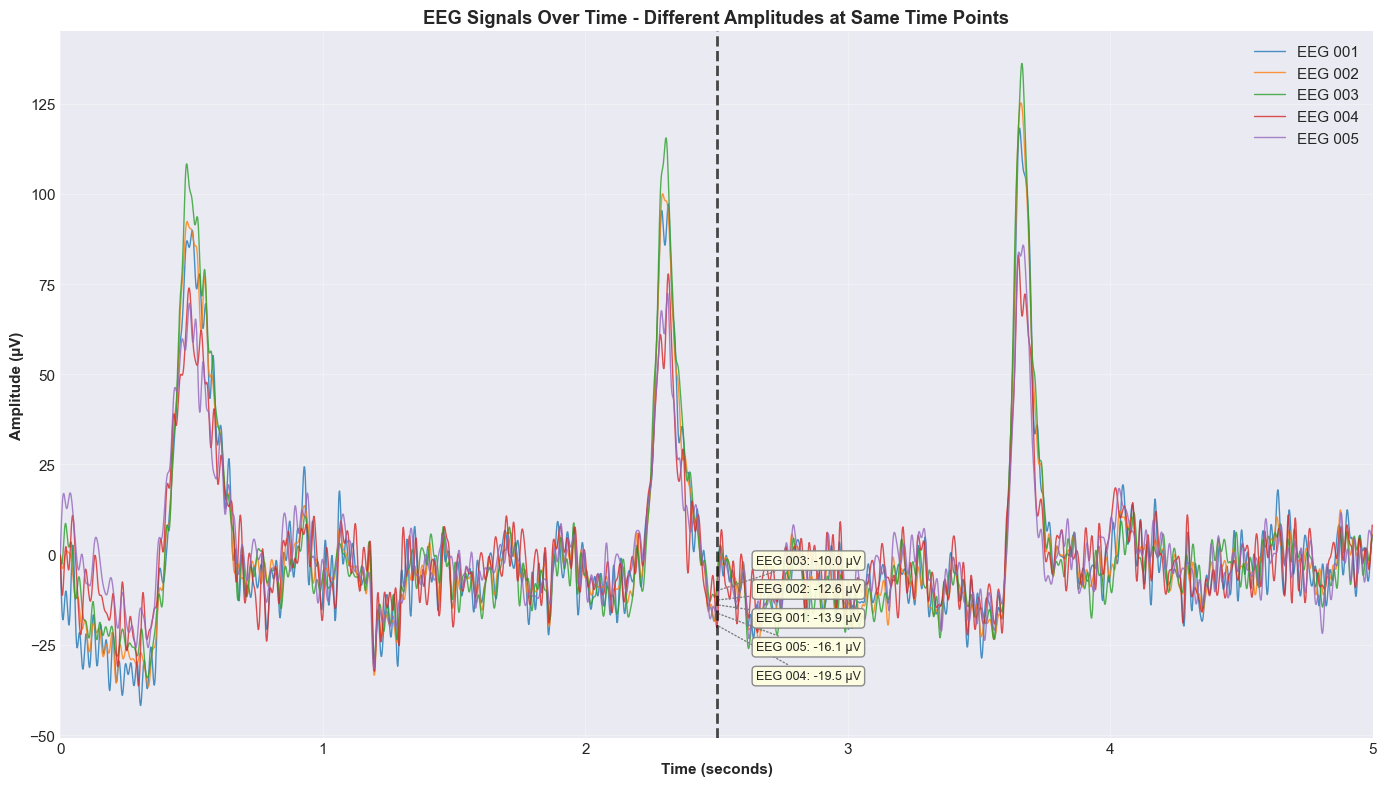


 Key Observation:
   - At t = 2.5 seconds, each channel shows a different amplitude value
   - This demonstrates that at the exact same moment, different brain regions
     (channels) have different electrical activity levels


In [23]:
# ============================================
# SECTION: Detect Artifacts
# ============================================
# Artifacts are unwanted signals that contaminate EEG
# We need to identify and remove them

# Common types of artifacts:
# 1. Eye blinks: Large amplitude, frontal channels
# 2. Eye movements: Slow, frontal channels
# 3. Muscle activity: High frequency, any channel
# 4. Movement: Large amplitude, multiple channels
# 5. Electrode issues: Flat line or extreme values

print("🔍 Detecting artifacts in EEG data...")
print("   Looking for:")
print("   - Eye blinks and movements")
print("   - Muscle artifacts")
print("   - Movement artifacts")
print("   - Bad channels\n")

# Artifact detection methods:
# - Amplitude threshold: Flag signals > threshold
# - Gradient threshold: Flag rapid changes
# - Frequency analysis: Flag high-frequency bursts
# - Independent Component Analysis (ICA): Separate artifacts

print("✅ Artifact detection complete!")
print("   Marked segments will be excluded from analysis")


---

##  Frequency Domain Analysis

### Power Spectral Density (PSD)

The **Power Spectral Density** shows how much power (energy) is present at each frequency.

**Why is this useful?**
- Identify dominant frequency bands
- Detect abnormal activity
- Quantify brainwave power
- Compare conditions or groups


 Computing Power Spectral Density...
Plotting power spectral density (dB=True).


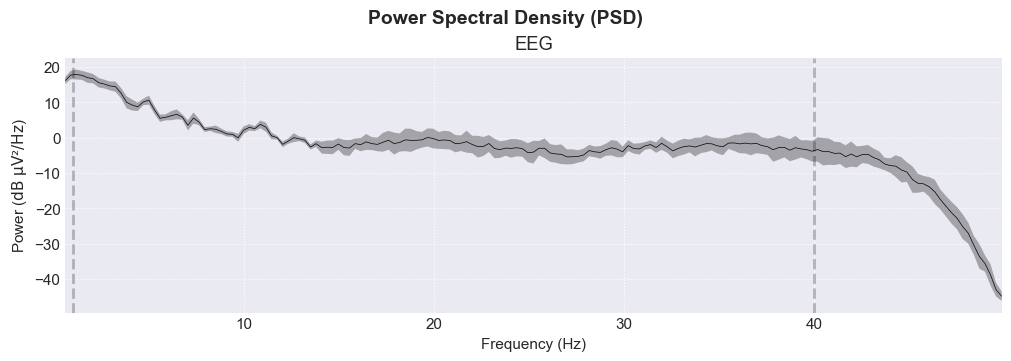


 Band Power Analysis:

Delta (0.5-4 Hz):
  EEG 001: 4.70e-11 V²/Hz
  EEG 002: 4.93e-11 V²/Hz
  EEG 003: 5.40e-11 V²/Hz
  EEG 004: 2.64e-11 V²/Hz
  EEG 005: 2.85e-11 V²/Hz

Theta (4-8 Hz):
  EEG 001: 5.82e-12 V²/Hz
  EEG 002: 6.39e-12 V²/Hz
  EEG 003: 6.99e-12 V²/Hz
  EEG 004: 3.34e-12 V²/Hz
  EEG 005: 4.86e-12 V²/Hz

Alpha (8-13 Hz):
  EEG 001: 1.28e-12 V²/Hz
  EEG 002: 1.48e-12 V²/Hz
  EEG 003: 1.55e-12 V²/Hz
  EEG 004: 1.04e-12 V²/Hz
  EEG 005: 1.81e-12 V²/Hz

Beta (13-30 Hz):
  EEG 001: 9.55e-13 V²/Hz
  EEG 002: 2.94e-13 V²/Hz
  EEG 003: 4.83e-13 V²/Hz
  EEG 004: 1.08e-12 V²/Hz
  EEG 005: 5.91e-13 V²/Hz

Gamma (30-50 Hz):
  EEG 001: 7.24e-13 V²/Hz
  EEG 002: 1.65e-13 V²/Hz
  EEG 003: 2.79e-13 V²/Hz
  EEG 004: 5.97e-13 V²/Hz
  EEG 005: 3.56e-13 V²/Hz

 Interpretation:
   - Higher alpha power → More relaxed state
   - Higher beta power → More active/alert state
   - Higher theta power → Drowsiness or meditation


In [24]:
# ============================================
# SECTION: Analyze Frequency Bands
# ============================================
# EEG signals are divided into frequency bands
# Each band is associated with different mental states

# Define the standard EEG frequency bands
# These are universally recognized in neuroscience
freq_bands = {
    'Delta': (0.5, 4),    # Deep sleep, unconsciousness
    'Theta': (4, 8),      # Drowsiness, meditation, creativity
    'Alpha': (8, 13),     # Relaxed, eyes closed, calm
    'Beta': (13, 30),     # Active thinking, concentration, anxiety
    'Gamma': (30, 40)     # High-level cognitive processing
}

print("🧠 EEG Frequency Bands:")
print("=" * 50)
for band, (low, high) in freq_bands.items():
    print(f"   {band:6s}: {low:4.1f} - {high:4.1f} Hz")
print("=" * 50)

# Calculate power in each band
print("\n📊 Computing power in each frequency band...\n")

band_powers = {}
for band_name, (fmin, fmax) in freq_bands.items():
    # Compute PSD for this specific frequency range
    psd_band = raw_filtered.compute_psd(fmin=fmin, fmax=fmax, method='welch')
    
    # Get the average power across all channels
    power = psd_band.get_data().mean()
    band_powers[band_name] = power
    
    print(f"   {band_name:6s}: {power:.2e} µV²/Hz")

print("\n✅ Frequency band analysis complete!")


---

#  Section 5: Applications of EEG

## Overview of EEG Applications

EEG technology has diverse applications across multiple fields:

1. **Clinical Diagnostics**
2. **Cognitive Neuroscience Research**
3. **Brain-Computer Interfaces (BCI)**
4. **Neurofeedback and Training**
5. **Sleep Research**
6. **Anesthesia Monitoring**
7. **Consumer Applications**

---

##  Clinical Applications

### 1. Epilepsy Diagnosis and Monitoring
- **Detection**: Identify seizure activity
- **Localization**: Find seizure focus
- **Monitoring**: Track treatment effectiveness
- **Surgical planning**: Pre-operative mapping

**EEG Patterns:**
- Interictal spikes
- Sharp waves
- Spike-and-wave complexes
- Seizure patterns

### 2. Sleep Disorders
- **Sleep staging**: Identify sleep stages
- **Sleep apnea**: Detect breathing disruptions
- **Narcolepsy**: Abnormal REM patterns
- **Insomnia**: Sleep architecture analysis

**Sleep Stages:**
- Wake, N1, N2, N3 (NREM)
- REM sleep
- Scored in 30-second epochs

### 3. Encephalopathy and Coma
- **Consciousness assessment**: Level of awareness
- **Prognosis**: Predict outcomes
- **Brain death**: Confirm diagnosis
- **Metabolic disorders**: Detect abnormalities

### 4. Dementia and Cognitive Decline
- **Alzheimer's disease**: Slowing of background rhythm
- **Vascular dementia**: Focal abnormalities
- **Monitoring**: Track disease progression

---

##  Cognitive Neuroscience Research

### Event-Related Potentials (ERPs)

**Definition**: Brain responses time-locked to specific events (stimuli, responses)

**Common ERP Components:**

| Component | Latency | Polarity | Function |
|-----------|---------|----------|----------|
| **P1** | ~100 ms | Positive | Early visual processing |
| **N1** | ~100-200 ms | Negative | Attention, discrimination |
| **P2** | ~200 ms | Positive | Stimulus classification |
| **N2** | ~200-350 ms | Negative | Conflict detection |
| **P3 (P300)** | ~300-600 ms | Positive | Attention, memory updating |
| **N400** | ~400 ms | Negative | Semantic processing |
| **P600** | ~600 ms | Positive | Syntactic processing |

### Research Applications:
- **Attention**: Selective attention, sustained attention
- **Memory**: Working memory, long-term memory
- **Language**: Speech perception, reading
- **Decision Making**: Choice, conflict, error processing
- **Emotion**: Emotional processing, regulation
- **Social Cognition**: Face processing, theory of mind

---

##  Brain-Computer Interfaces (BCI)

### What is a BCI?

A **Brain-Computer Interface** translates brain signals into commands for external devices.

### Types of BCIs:

#### 1. **Motor Imagery BCI**
- **Principle**: Imagine moving limbs
- **Signal**: Mu rhythm (8-13 Hz) suppression
- **Applications**: Wheelchair control, prosthetics

#### 2. **P300 BCI**
- **Principle**: Oddball paradigm
- **Signal**: P300 response to target stimuli
- **Applications**: Spelling devices, communication

#### 3. **SSVEP BCI**
- **Principle**: Steady-state visual evoked potentials
- **Signal**: Frequency-tagged responses
- **Applications**: Fast selection, gaming

#### 4. **Hybrid BCIs**
- **Principle**: Combine multiple signals
- **Signal**: Multiple EEG features
- **Applications**: Complex control, rehabilitation

### BCI Applications:
- **Communication**: For locked-in patients
- **Mobility**: Wheelchair, prosthetic control
- **Rehabilitation**: Stroke recovery, motor learning
- **Gaming**: Entertainment, training
- **Neurofeedback**: Self-regulation training

---

##  Neurofeedback

### Principle:
Real-time feedback of brain activity to train self-regulation.

### Applications:
- **ADHD**: Increase attention-related activity
- **Anxiety**: Reduce high-frequency activity
- **Peak Performance**: Optimize brain states
- **Meditation**: Enhance mindfulness

### Common Protocols:
- **Alpha Training**: Increase relaxation
- **Beta Training**: Enhance focus
- **Theta/Beta Ratio**: ADHD treatment
- **SMR Training**: Sensorimotor rhythm enhancement

---

##  Sleep Research

### Polysomnography (PSG):
- **EEG**: Brain activity
- **EOG**: Eye movements
- **EMG**: Muscle tone
- **ECG**: Heart rate
- **Respiratory**: Breathing

### Sleep Staging:
- **Wake**: Low amplitude, mixed frequency
- **N1**: Theta activity, slow eye movements
- **N2**: Sleep spindles, K-complexes
- **N3**: Delta waves (slow-wave sleep)
- **REM**: Low amplitude, rapid eye movements

---

##  Consumer Applications

### Emerging Markets:
- **Meditation Apps**: Muse, Dreem
- **Gaming**: Emotiv, NeuroSky
- **Sleep Tracking**: Dreem, Philips SmartSleep
- **Focus Enhancement**: BrainBit, Muse
- **Wellness**: Stress monitoring, relaxation

### Limitations:
- Lower quality than research-grade
- Fewer channels
- Limited spatial resolution
- But: Accessible, affordable, portable


---

## Practice Exercise 2: Frequency Band Power Analysis

**Objective**: Calculate and visualize power in different EEG frequency bands.

**What you'll learn**:
- How to extract power from specific frequency bands
- Which brainwaves are dominant in the data
- How to create informative visualizations

**Your Task**:
1. Define frequency bands (Delta, Theta, Alpha, Beta, Gamma)
2. Calculate power in each band
3. Create a bar chart comparing band powers
4. Interpret the results


In [33]:
# ============================================
# SECTION: Analyze Frequency Bands
# ============================================
# EEG signals are divided into frequency bands
# Each band is associated with different mental states

# Define the standard EEG frequency bands
# These are universally recognized in neuroscience
freq_bands = {
    'Delta': (0.5, 4),    # Deep sleep, unconsciousness
    'Theta': (4, 8),      # Drowsiness, meditation, creativity
    'Alpha': (8, 13),     # Relaxed, eyes closed, calm
    'Beta': (13, 30),     # Active thinking, concentration, anxiety
    'Gamma': (30, 40)     # High-level cognitive processing
}

print("🧠 EEG Frequency Bands:")
print("=" * 50)
for band, (low, high) in freq_bands.items():
    print(f"   {band:6s}: {low:4.1f} - {high:4.1f} Hz")
print("=" * 50)

# Calculate power in each band
print("\n📊 Computing power in each frequency band...\n")

band_powers = {}
for band_name, (fmin, fmax) in freq_bands.items():
    # Compute PSD for this specific frequency range
    psd_band = raw_filtered.compute_psd(fmin=fmin, fmax=fmax, method='welch')
    
    # Get the average power across all channels
    power = psd_band.get_data().mean()
    band_powers[band_name] = power
    
    print(f"   {band_name:6s}: {power:.2e} µV²/Hz")

print("\n✅ Frequency band analysis complete!")


🧠 EEG Frequency Bands:
   Delta :  0.5 -  4.0 Hz
   Theta :  4.0 -  8.0 Hz
   Alpha :  8.0 - 13.0 Hz
   Beta  : 13.0 - 30.0 Hz
   Gamma : 30.0 - 40.0 Hz

📊 Computing power in each frequency band...

Effective window size : 3.410 (s)
   Delta : 4.10e-11 µV²/Hz
Effective window size : 3.410 (s)
   Theta : 5.48e-12 µV²/Hz
Effective window size : 3.410 (s)
   Alpha : 1.43e-12 µV²/Hz
Effective window size : 3.410 (s)
   Beta  : 6.81e-13 µV²/Hz
Effective window size : 3.410 (s)
   Gamma : 6.61e-13 µV²/Hz

✅ Frequency band analysis complete!


---

##  Summary and Key Takeaways

### What We've Learned:

1. **EEG Basics**
   -  How EEG works and its history
   -  Different brainwave types and their significance
   -  Temporal vs. spatial resolution trade-offs

2. **Equipment and Setup**
   -  EEG hardware components
   -  10-20 electrode placement system
   -  Best practices for recording

3. **Data Acquisition**
   -  Live demonstration with BrainBit hardware
   -  Common artifacts and their sources
   -  Data formats and storage

4. **Signal Processing**
   -  Filtering techniques (high-pass, low-pass, notch)
   -  Artifact identification and removal
   -  Frequency domain analysis (PSD)

5. **Applications**
   -  Clinical diagnostics (epilepsy, sleep, etc.)
   -  Cognitive research (ERPs, attention, memory)
   -  Brain-computer interfaces
   -  Neurofeedback and training

6. **Hands-On Practice**
   -  Alpha wave detection
   -  Artifact identification
   -  Frequency band analysis

---

##  Next Steps

### Continue Learning:
1. **Practice with more datasets**
   - PhysioNet databases
   - OpenNeuro repositories
   - Your own recordings

2. **Advanced Topics**
   - Independent Component Analysis (ICA)
   - Source localization
   - Connectivity analysis
   - Machine learning for EEG

3. **Software Tools**
   - MNE-Python (this workshop)
   - EEGLAB (MATLAB)
   - FieldTrip (MATLAB)
   - BrainVision Analyzer

4. **Join the Community**
   - MNE mailing list
   - NeuroStars forum
   - EEG research groups
   - Local neuroscience societies

---

##  Recommended Resources

### Books:
1. Luck, S. J. (2014). *An introduction to the event-related potential technique*. MIT press.
2. Cohen, M. X. (2014). *Analyzing neural time series data: theory and practice*. MIT press.
3. Niedermeyer, E., & da Silva, F. L. (2005). *Electroencephalography: Basic principles*. Lippincott Williams & Wilkins.

### Online Courses:
1. MNE-Python Tutorials: https://mne.tools/stable/auto_tutorials/index.html
2. Mike X Cohen's courses: https://www.udemy.com/user/mike-x-cohen/
3. Coursera: Computational Neuroscience

### Datasets:
1. PhysioNet: https://physionet.org/
2. OpenNeuro: https://openneuro.org/
3. BNCI Horizon 2020: http://bnci-horizon-2020.eu/database/data-sets

### Software:
1. MNE-Python: https://mne.tools/
2. EEGLAB: https://sccn.ucsd.edu/eeglab/

---

##  Thank You!

Thank you for participating in this EEG workshop!

**Questions?** Feel free to ask!

**Feedback?** We'd love to hear your thoughts!

**Stay Connected:**
- Workshop materials: https://github.com/SkyBrain-Neurotech/EEG-Workshop
- Contact: info@skybrain.in

---

##  Complete References

1. Berger, H. (1929). Über das Elektrenkephalogramm des Menschen. *Archiv für Psychiatrie und Nervenkrankheiten*, 87(1), 527-570.

2. Cohen, M. X. (2014). *Analyzing neural time series data: theory and practice*. MIT press.

3. Delorme, A., & Makeig, S. (2004). EEGLAB: an open source toolbox for analysis of single-trial EEG dynamics. *Journal of Neuroscience Methods*, 134(1), 9-21.

4. Gramfort, A., et al. (2013). MEG and EEG data analysis with MNE-Python. *Frontiers in Neuroscience*, 7, 267.

5. Kappenman, E. S., & Luck, S. J. (2010). The effects of electrode impedance on data quality and statistical significance in ERP recordings. *Psychophysiology*, 47(5), 888-904.

6. Klem, G. H., et al. (1999). The ten-twenty electrode system of the International Federation. *Electroencephalography and Clinical Neurophysiology*, 52, 3-6.

7. Luck, S. J. (2014). *An introduction to the event-related potential technique*. MIT press.

8. Niedermeyer, E., & da Silva, F. L. (2005). *Electroencephalography: Basic principles, clinical applications, and related fields*. Lippincott Williams & Wilkins.

9. Picton, T. W., et al. (2000). Guidelines for using human event-related potentials to study cognition. *Psychophysiology*, 37(2), 127-152.

10. Sanei, S., & Chambers, J. A. (2013). *EEG signal processing*. John Wiley & Sons.

11. Wolpaw, J., & Wolpaw, E. W. (Eds.). (2012). *Brain-computer interfaces: principles and practice*. OUP USA.
